# 三硬币模型

<font size=3>EM算法的一个经典例子是三硬币模型。假设有A，B，C三枚硬币，其出现正面的概率分别为$\pi$，$p$和$q$。使用三枚硬币进行如下试验：先抛掷硬币A，根据其结果来选择硬币B或者C，假设正面选B，反面选C，然后记录硬币结果，正面记为1，反面记为0，独立重复5次试验，每次试验重复抛掷B或者C10次。问如何估计三枚硬币分别出现正面的概率。

假设现在有两枚硬币1和2，,随机抛掷后正面朝上概率分别为P1，P2。为了估计这两个概率，做实验，每次取一枚硬币，连掷5下，记录下结果，如下：

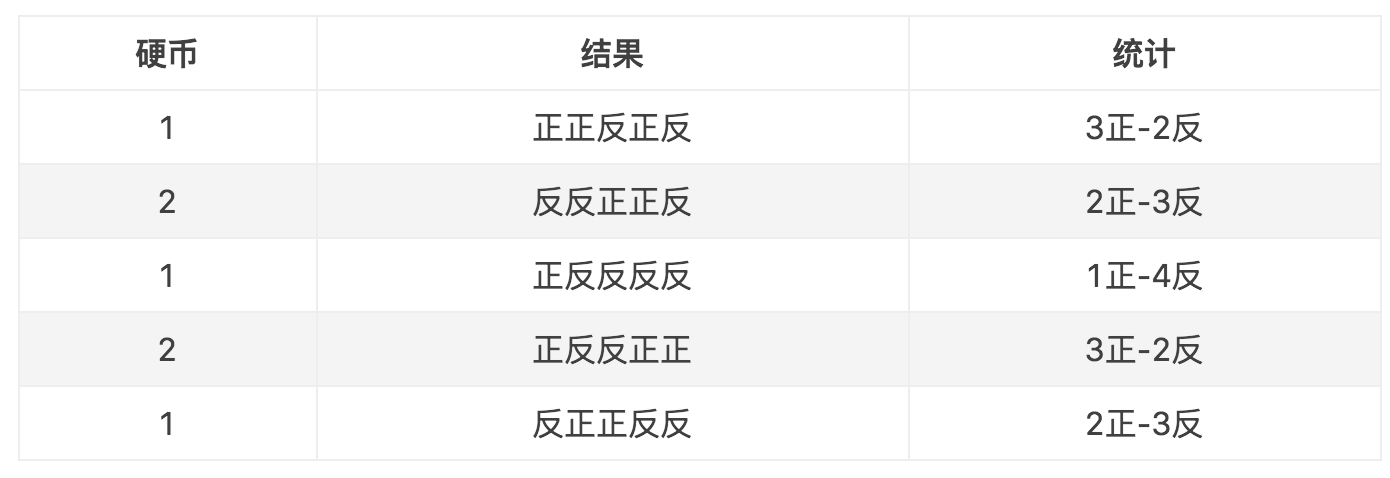

可以很容易地估计出P1和P2，如下：

$P1 = （3+1+2）/ 15 = 0.4$

$P2= （2+3）/10 = 0.5$

这里（两枚硬币1和2）就是三硬币模型中的第一枚硬币，硬币1和2分别是B和C硬币，P1和P2就是p和q

https://zhuanlan.zhihu.com/p/102275054

<font size =3>隐变量z未知，即条件概率的条件被隐藏了，本来可以最大似然求两个硬币概率为P1和P2，被隐藏后我们初始一个P1和P2，求出z（用的哪个硬币），再接着求新的P1和P2
- 新估计出的P1和P2一定会更接近真实的P1和P2？
答案是：没错，一定会更接近真实的P1和P2，数学可以证明，但这超出了本文的主题，请参阅其他书籍或文章。
- 迭代一定会收敛到真实的P1和P2吗？
答案是：不一定，取决于P1和P2的初始化值，上面我们之所以能收敛到P1和P2，是因为我们幸运地找到了好的初始化值。

<font size =3>相比于前面的方法，我们按照最大似然概率，直接将第1轮估计为用的硬币2，此时的我们更加谨慎，我们只说，有0.14的概率是硬币1，有0.86的概率是硬币2，不再是非此即彼(**硬币预测概率化,即A硬币的概率**）。这样我们在估计P1或者P2时，就可以用上全部的数据，而不是部分的数据，显然这样会更好一些。
这一步，我们实际上是估计出了z的概率分布，这步被称作E步

<font size =3>可以看到，改变了z值的估计方法后，新估计出的P1要更加接近0.4。原因就是我们使用了所有抛掷的数据，而不是之前只使用了部分的数据。这步中，我们根据E步中求出的z的概率分布，依据最大似然概率法则去估计P1和P2，被称作M步。

## 关键：初始的P1和P2是假的，反推回来的每次是A或B也是假的，因此估计出P0后要重新给A和B分权重

In [2]:
#用numpy来实现一个简单的EM算法过程来求解三硬币问题。完整代码如下：
import numpy as np

def em(data, thetas, max_iter=50, eps=1e-3):
    '''
    data：观测数据
    thetas：估计参数
    max_iter：最大迭代次数
    eps：收敛阈值
    '''
    # 初始化似然函数值
    ll_old = -np.infty
    for i in range(max_iter):
        ### E步：求隐变量分布
        # 对数似然
        log_like = np.array([np.sum(data * np.log(theta), axis=1) for theta in thetas])
        # 似然
        like = np.exp(log_like)
        # 求隐变量分布
        ws = like/like.sum(0)
        # 概率加权
        vs = np.array([w[:, None] * data for w in ws])
        ### M步：更新参数值
        thetas = np.array([v.sum(0)/v.sum() for v in vs])
        # 更新似然函数
        ll_new = np.sum([w*l for w, l in zip(ws, log_like)])
        print("Iteration: %d" % (i+1))
        print("theta_B = %.2f, theta_C = %.2f, ll = %.2f" 
              % (thetas[0,0], thetas[1,0], ll_new))
        # 满足迭代条件即退出迭代
        if np.abs(ll_new - ll_old) < eps:
            break
        ll_old = ll_new
    return thetas

In [3]:
# 观测数据，5次独立试验，每次试验10次抛掷的正反次数
# 比如第一次试验为5次正面5次反面
observed_data = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
# 初始化参数值，即硬币B的正面概率为0.6，硬币C的正面概率为0.5
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])
eps = 0.01
max_iter = 50
thetas = em(observed_data, thetas, max_iter=50, eps=1e-3)

Iteration: 1
theta_B = 0.71, theta_C = 0.58, ll = -32.69
Iteration: 2
theta_B = 0.75, theta_C = 0.57, ll = -31.26
Iteration: 3
theta_B = 0.77, theta_C = 0.55, ll = -30.76
Iteration: 4
theta_B = 0.78, theta_C = 0.53, ll = -30.33
Iteration: 5
theta_B = 0.79, theta_C = 0.53, ll = -30.07
Iteration: 6
theta_B = 0.79, theta_C = 0.52, ll = -29.95
Iteration: 7
theta_B = 0.80, theta_C = 0.52, ll = -29.90
Iteration: 8
theta_B = 0.80, theta_C = 0.52, ll = -29.88
Iteration: 9
theta_B = 0.80, theta_C = 0.52, ll = -29.87
Iteration: 10
theta_B = 0.80, theta_C = 0.52, ll = -29.87
Iteration: 11
theta_B = 0.80, theta_C = 0.52, ll = -29.87
Iteration: 12
theta_B = 0.80, theta_C = 0.52, ll = -29.87
